In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

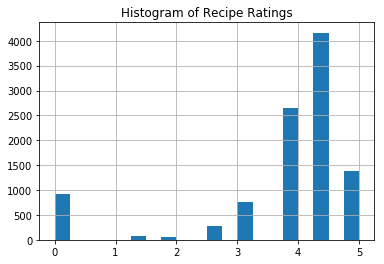

In [4]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

### Data Cleaning

In [5]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories                2097
protein                 2118
fat                     2126
sodium                  2098
ground lamb                1
guam                       1
guava                      1
haiti                      1
halibut                    1
halloween                  1
ham                        1
hamburger                  1
hanukkah                   1
harpercollins              1
hawaii                     1
hazelnut                   1
healdsburg                 1
healthy                    1
herb                       1
high fiber                 1
hollywood                  1
hominy/cornmeal/masa       1
honey                      1
honeydew                   1
hors d'oeuvre              1
horseradish                1
hot drink                  1
hot pepper                 1
house & garden             1
house cocktail             1
                        ... 
walnut                     1
wasabi                     1
washington                 1
washington, d.

In [6]:
dg=np.var(raw_data,axis=0).head(31)

In [7]:
df=raw_data[dg.index[0:31].values]
df=df.dropna()

In [8]:
np.any(np.isnan(df))

False

In [9]:
np.all(np.isfinite(df))

True

In [10]:
df=df[np.isfinite(df)]

In [11]:
from sklearn.svm import SVR
svr = SVR()

X = df.drop(['rating'],1)
Y = df.rating

svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

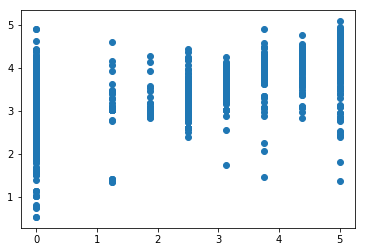

In [12]:
plt.scatter(Y, svr.predict(X))

In [13]:
svr.score(X,Y)

0.47979307571591756

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([-0.02148871,  0.02043138,  0.01256618,  0.00606401,  0.00443387])